<a href="https://colab.research.google.com/github/ayudixit/ML_Training/blob/main/Ayush-Dixit-test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

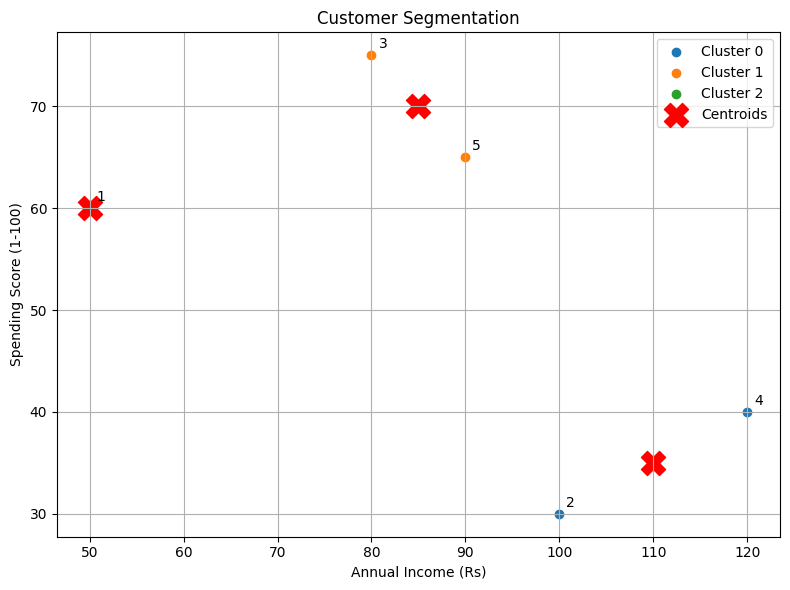

   Customer ID  Annual Income (Rs)  Spending Score (1-100)  Cluster
0            1                  50                      60        2
1            2                 100                      30        0
2            3                  80                      75        1
3            4                 120                      40        0
4            5                  90                      65        1

Cluster 0:
       Customer ID  Annual Income (Rs)  Spending Score (1-100)  Cluster
count     2.000000            2.000000                2.000000      2.0
mean      3.000000          110.000000               35.000000      0.0
std       1.414214           14.142136                7.071068      0.0
min       2.000000          100.000000               30.000000      0.0
25%       2.500000          105.000000               32.500000      0.0
50%       3.000000          110.000000               35.000000      0.0
75%       3.500000          115.000000               37.500000      0.0
max 

In [ ]:
kimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data (you would typically load this from a CSV file)
data = {
    'Customer ID': [1, 2, 3, 4, 5],
    'Annual Income (Rs)': [50, 100, 80, 120, 90],
    'Spending Score (1-100)': [60, 30, 75, 40, 65]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Extract features for clustering
X = df[['Annual Income (Rs)', 'Spending Score (1-100)']].values

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = df[df["Cluster"] == cluster]
    plt.scatter(
        cluster_data["Annual Income (Rs)"],
        cluster_data["Spending Score (1-100)"],
        label=f"Cluster {cluster}"
    )
# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c="red", marker="X", label="Centroids")

plt.title("Customer Segmentation")
plt.xlabel("Annual Income (Rs)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid()


# Add customer IDs as labels
for i, txt in enumerate(df['Customer ID']):
    plt.annotate(txt, (X[i, 0], X[i, 1]), xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Print the results
print(df)

# Describe the clusters
for cluster in range(3):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())